**Problem Statement** 

This dataset could be used to train a ANN regression model that can predict the price of a car based on its age, mileage, engine specifications, paint color, transmission type, number of doors, and weight.

The “TARGET variable in this dataset is the “PRICE” variable on which will be predicted by the ANN regression.

The rest of the variables are used for training the models.

total Rows(1436)

total columns(10)

In [2]:
#import libraries
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
#read the file
df = pd.read_csv('/content/CarPricesData.csv')

In [4]:

#records and columns
df.shape

(1436, 10)

In [5]:
#snapshot of the data
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [6]:
df.tail()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1431,7500,69.0,20544,Petrol,86,1,0,1300.0,3,1025.0
1432,10845,72.0,19000,Petrol,86,0,0,1300.0,3,1015.0
1433,8500,71.0,17016,Petrol,86,0,0,1300.0,3,1015.0
1434,7250,70.0,16916,Petrol,86,1,0,1300.0,3,1015.0
1435,6950,76.0,1,Petrol,110,0,0,1600.0,5,1114.0


In [7]:
# checking columns
df.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [8]:
df.value_counts()

Price  Age   KM      FuelType  HP   MetColor  Automatic  CC      Doors  Weight
24950  8.0   13253   Diesel    116  1         0          2000.0  5      1320.0    2
4350   44.0  158320  Diesel    69   0         0          1800.0  5      1110.0    1
10950  54.0  71725   Petrol    110  1         0          1600.0  4      1035.0    1
       57.0  80470   Petrol    110  0         0          1600.0  5      1085.0    1
             61682   Petrol    110  0         0          1600.0  3      1050.0    1
                                                                                 ..
8950   54.0  64000   Petrol    97   1         0          1400.0  3      1025.0    1
             61000   Diesel    69   0         0          2000.0  5      1140.0    1
       53.0  115113  Petrol    97   1         0          1400.0  3      1025.0    1
             90200   Petrol    97   0         0          1400.0  3      1025.0    1
32500  4.0   1       Diesel    116  0         0          2000.0  5      1480.0   

In [9]:
#to understand the datatype for each of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1434 non-null   float64
 2   KM         1436 non-null   int64  
 3   FuelType   1432 non-null   object 
 4   HP         1436 non-null   int64  
 5   MetColor   1436 non-null   int64  
 6   Automatic  1436 non-null   int64  
 7   CC         1434 non-null   float64
 8   Doors      1436 non-null   int64  
 9   Weight     1434 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 112.3+ KB


In [10]:
df.dtypes


Price          int64
Age          float64
KM             int64
FuelType      object
HP             int64
MetColor       int64
Automatic      int64
CC           float64
Doors          int64
Weight       float64
dtype: object

In [11]:
print(df.nunique())

Price         236
Age            77
KM           1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64


In [12]:
#null values
df.isna().sum()

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64

In [13]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1434.000000,1436.000000,1436.000000,1436.000000,1436.000000,1434.000000,1436.000000,1434.000000
mean,10730.824513,55.986750,68533.259749,101.502089,0.674791,0.055710,1566.990934,4.033426,1072.487448
std,3626.964585,18.581796,37506.448872,14.981080,0.468616,0.229441,187.178221,0.952677,52.672475
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.000000


In [14]:
# one hot encoder
FuelType_dummies = pd.get_dummies(prefix='Fue',data=df,columns=['FuelType'])

In [15]:
label_df = FuelType_dummies.head()
label_df

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Fue_CNG,Fue_Diesel,Fue_Petrol
0,13500,23.0,46986,90,1,0,2000.0,3,1165.0,0,1,0
1,13750,23.0,72937,90,1,0,2000.0,3,1165.0,0,1,0
2,13950,24.0,41711,90,1,0,2000.0,3,1165.0,0,1,0
3,14950,26.0,48000,90,0,0,2000.0,3,1165.0,0,1,0
4,13750,30.0,38500,90,0,0,2000.0,3,1170.0,0,1,0


In [16]:
# Create a copy of the original dataset
cars_scaled = df.copy()

# Select the numeric columns to scale
numeric_cols = [col for col in df.select_dtypes(include=['float', 'int']).columns
                if col not in [ 'MetColor', 'Automatic']]

# Define the min-max scaling function
def min_max_scaler(col):
    return (col - col.min()) / (col.max() - col.min())

# Apply the min-max scaling function to the numeric columns
cars_scaled[numeric_cols] = cars_scaled[numeric_cols].apply(min_max_scaler)
# Print the scaled dataset
cars_scaled.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0.325044,0.278481,0.193355,Diesel,0.170732,1,0,1.0,0.333333,0.268293
1,0.333925,0.278481,0.300149,Diesel,0.170732,1,0,1.0,0.333333,0.268293
2,0.341030,0.291139,0.171647,Diesel,0.170732,1,0,1.0,0.333333,0.268293
3,0.376554,0.316456,0.197528,Diesel,0.170732,0,0,1.0,0.333333,0.268293
4,0.333925,0.367089,0.158433,Diesel,0.170732,0,0,1.0,0.333333,0.276423


In [17]:
#one hot encoder
FuelType_dummies = pd.get_dummies(prefix='Fue',data=df,columns=['FuelType'])
df_train = FuelType_dummies
df_train.head(10)

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Fue_CNG,Fue_Diesel,Fue_Petrol
0,13500,23.0,46986,90,1,0,2000.0,3,1165.0,0,1,0
1,13750,23.0,72937,90,1,0,2000.0,3,1165.0,0,1,0
2,13950,24.0,41711,90,1,0,2000.0,3,1165.0,0,1,0
3,14950,26.0,48000,90,0,0,2000.0,3,1165.0,0,1,0
4,13750,30.0,38500,90,0,0,2000.0,3,1170.0,0,1,0
5,12950,32.0,61000,90,0,0,2000.0,3,1170.0,0,1,0
6,16900,27.0,94612,90,1,0,2000.0,3,1245.0,0,1,0
7,18600,30.0,75889,90,1,0,2000.0,3,1245.0,0,1,0
8,21500,27.0,19700,192,0,0,1800.0,3,1185.0,0,0,1
9,12950,23.0,71138,69,0,0,1900.0,3,1105.0,0,1,0


In [32]:
df['CC']=df['CC'].fillna(0)
df['Age']=df['Age'].fillna(0)
df['Weight']=df['Weight'].fillna(0)
df['FuelType']=df['FuelType'].fillna(0)

In [19]:
df.isna().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

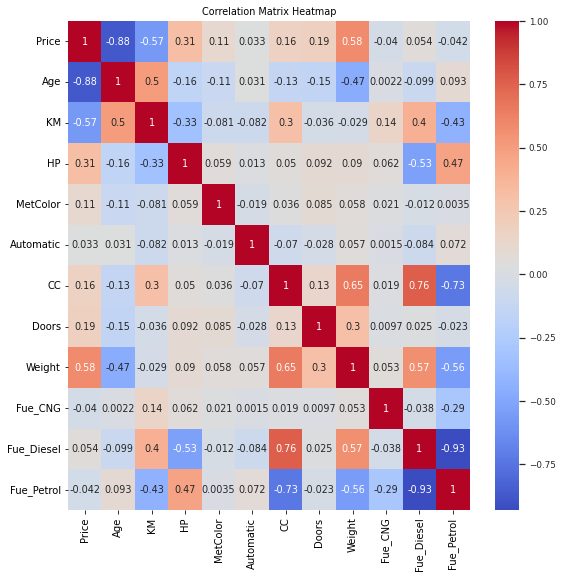

In [20]:
corr_matrix = df_train.corr()

# Set the figure size
plt.subplots(figsize=(9, 9))

# Create a heatmap of the correlation matrix
sns.set(font_scale=0.8)
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [33]:
df_train.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Fue_CNG,Fue_Diesel,Fue_Petrol
0,13500,23.0,46986,90,1,0,2000.0,3,1165.0,0,1,0
1,13750,23.0,72937,90,1,0,2000.0,3,1165.0,0,1,0
2,13950,24.0,41711,90,1,0,2000.0,3,1165.0,0,1,0
3,14950,26.0,48000,90,0,0,2000.0,3,1165.0,0,1,0
4,13750,30.0,38500,90,0,0,2000.0,3,1170.0,0,1,0


In [ ]:
def train_test_split(X, y, test_size=0.2, random_state=None):

    # Shuffle the data
    if random_state is not None:
        np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(X))
    X_shuffled = X.iloc[shuffled_indices]
    y_shuffled = y.iloc[shuffled_indices]
    
    # Calculate the number of instances in the test subset
    n_test = int(len(X) * test_size)
    
    # Split the data
    X_train = X_shuffled[:-n_test]
    X_test = X_shuffled[-n_test:]
    y_train = y_shuffled[:-n_test]
    y_test = y_shuffled[-n_test:]
    
    return X_train, X_test, y_train, y_test

In [ ]:
# Create a new DataFrame 'X' with the target variable removed
X = df_train.drop(columns=['Price'], axis=1)

# Create a Series 'y' that contains the target variable values
y = df_train['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1149, 11)
(287, 11)
(1149,)
(287,)
